## 闭包

### 实现一个简单的平均值统计

In [1]:
# 最开始想到的就是通过定义一个类来实现
class Averager():
    
    def __init__(self):
        self.series = []
        
    def __call__(self, new_value):
        self.series.append(new_value)
        total = sum(self.series)
        return total/len(self.series)

avg = Averager()
print(avg(10))
print(avg(11))

10.0
10.5


In [2]:
# 可以通过函数式实现
def cal_averager():
    """返回一个函数对象"""
    series = list()
    
    def cal_result(new_value):
        """每次调用时，它会把参数添加到系列值中，然后计算当前平均值"""
        series.append(new_value)  # 这里 series 是自由变量
        total = sum(series)
        return total / len(series)
    return cal_result

avg2 = cal_averager()
print(avg2(10))
print(avg2(11))

10.0
10.5


👆上面两个例子有相似之处: 调用 `Averager()` 或者 `cal_averager()`都是得到一个可调用对象avg，它会更新历史值，然后计算当前均值<p>
示例2中就存在一个闭包
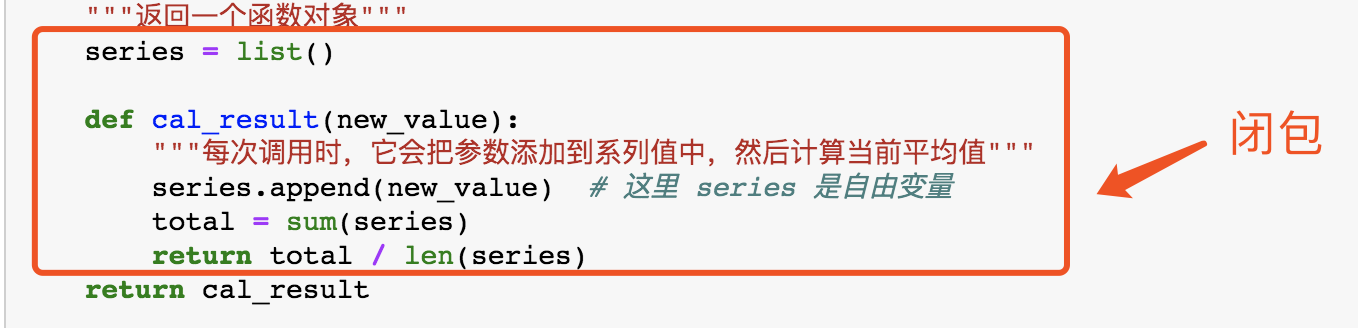

### nonlocal声明

在上面示例2中，我们把所有值存储在历史数列`series`中，然后在每次调用 `cal_result` 时使用 sum 求和。更好的实现方式是，只存储目前的总
值和元素个数，然后使用这两个数计算均值。

In [4]:
# 可以通过函数式实现
def cal_averager2():
    total = 0
    count = 0
    
    def cal_result2(new_value):
        # nonlocal count, total
        count += 1
        total += new_value
        return total / count
    return cal_result2

avg3 = cal_averager2()
print(avg3(10))


UnboundLocalError: local variable 'count' referenced before assignment

可以看到这里会报错, 那么是为什么呢, 可以看下[变量作用域与规则](variable_scope_demo.py)<p>
在上面示例2中没遇到这个问题，因为我们没有给 `series` 赋值，我们只是调用 `series.append`，并把它传给 sum 和 len。也就是说，我们利用了列表是可变的对象这一事实。<p>
但是对数字、字符串、元组等不可变类型来说，只能读取，不能更新。如果尝试重新绑定，例如 `count = count + 1`，其实会隐式创建局部变量 `count`。这样， count 就不是自由变量了，因此不会保存在闭包中<p>
为了解决这个问题, python3中引入了`nonlocal`声明。它的作用是把变量标记为自由变量，即使在函数中为变量赋予新值了，也会变成自由变量。如果为 `nonlocal` 声明的变量赋予新值，闭包中保存的绑定会更新
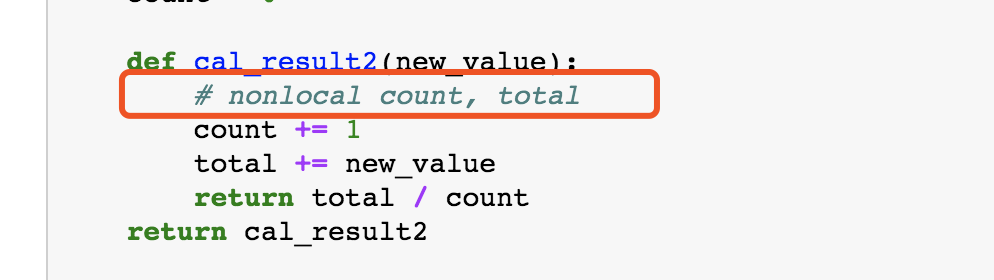